# Lab 5 : Clustering Part 2

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import sklearn.datasets as skl_data
from jupyterthemes import jtplot
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

#DBSCAN Algorithm

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a commonly used unsupervised clustering algorithm. DBSCAN does not need to specify the number of clusters. It can automatically detect the number of clusters based on your input data and parameters. More importantly, DBSCAN can find arbitrary shape clusters that k-means are not able to find.

# Algorithm:
a. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).

b. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.

c. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point



A. **Generate "N" spherical training data points.**


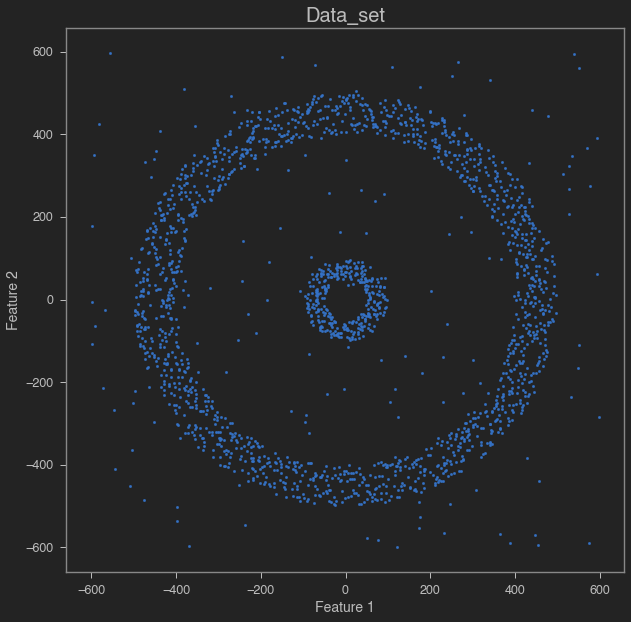

In [2]:
## write your code here
def circles(R,width,num):
    r = np.random.rand(num)*width+R
    phi = np.linspace(0,2.*np.pi, len(r))
    x= r * np.sin(phi)
    y = r* np.cos(phi)
    return x,y
def uniform(num,a):
    x = np.random.uniform(-a,a,num)
    y = np.random.uniform(-a,a,num)
    return x,y
def dtset(num):
    x,y = circles(400,100,num)
    data = np.array([x,y])
    x,y = circles(50,50,int(num/5))
    data = np.append(data,[x,y],axis=1)
    x,y = uniform(int(num/7.5),600)
    data = np.append(data,[x,y],axis=1)
    return data


data = dtset(1500)
data = np.unique(data,axis=0)
plt.figure(figsize=[10,10])
plt.scatter(data[0,:],data[1,:],marker='o',s=7)
plt.title('Data_set',fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);
data = data.T

## B. **Perform DBSCAN Algorithm on the above generated data to obtain clusters**

2.0


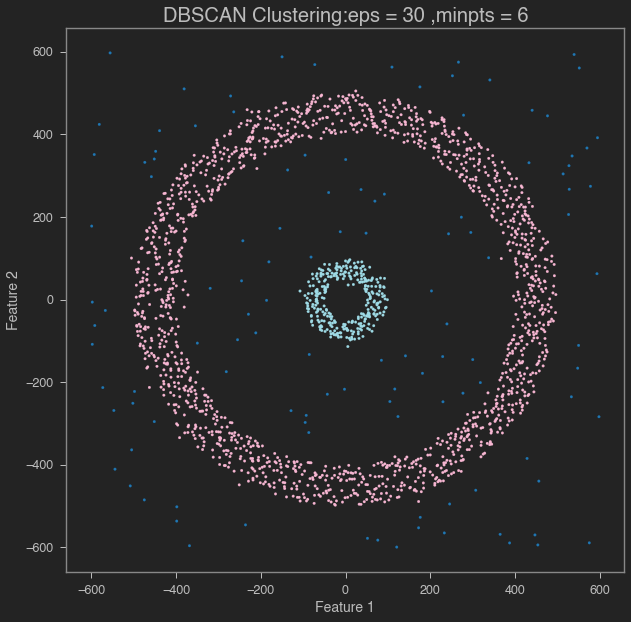

In [3]:
## Write your code here
def dist(p1,p2,eps):
    if np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 ) < eps:
        return 1
    else:
        return 0 
    
def dbscan(data,eps,minpts):
    labels = np.zeros(len(data[:,0]))
    curr_cl = 0
    for i in range(len(data[:,0])):
        if labels[i] != 0:
            continue
        neighbours = core(data,i,eps)
        if len(neighbours)<minpts:
            labels[i] = -1
            
        else:
            curr_cl +=1
            cluster(data,labels,i,neighbours,curr_cl,eps,minpts)
    return labels

def core(data,i,eps):
    neighbours = np.array([])
    for j in range(len(data[:,0])):
        if dist(data[i,:],data[j,:],eps) == 1:
            neighbours = np.append(neighbours,j)
    return(neighbours)

def cluster(data,labels,i,neighbours,curr_cl,eps,min_pts):
    labels[i] = curr_cl
    j=0
    while j < len(neighbours):
        p = int(neighbours[j])
        
        if labels[p] == -1:
            labels[p] = curr_cl
            
        elif labels[p] == 0:
            labels[p] = curr_cl
            
            N_neighbours = core(data,p,eps)
            
            if len(N_neighbours) >= min_pts:
                neighbours = np.append(neighbours,N_neighbours) 
        j+=1
eps = 30
min_pts = 6
clusters = dbscan(data,eps,min_pts)
print(np.max(clusters))
plt.figure(figsize=[10,10])
plt.scatter(data[:,0],data[:,1],c= clusters,s=7,cmap = 'tab20')
plt.title('DBSCAN Clustering:eps = '+str(eps)+" ,minpts = "+str(min_pts),fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);


C. **Experiment by varying the number of min points and epsilon radius and plot your observations**

-1.0
16.0
2.0
6.0


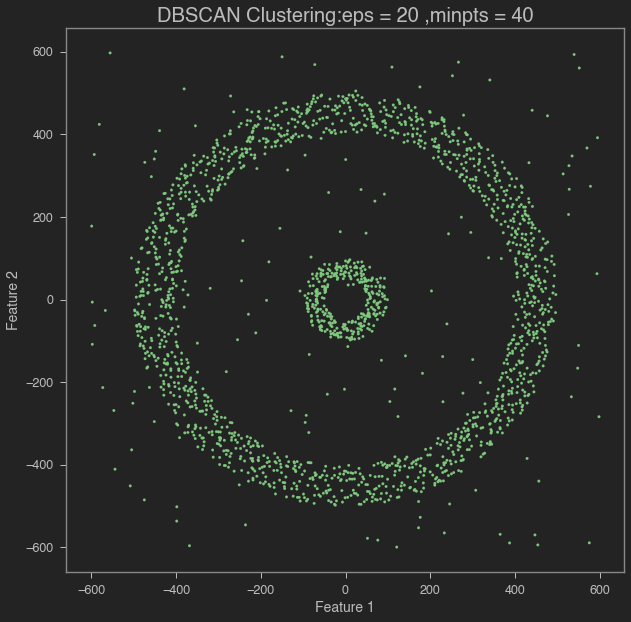

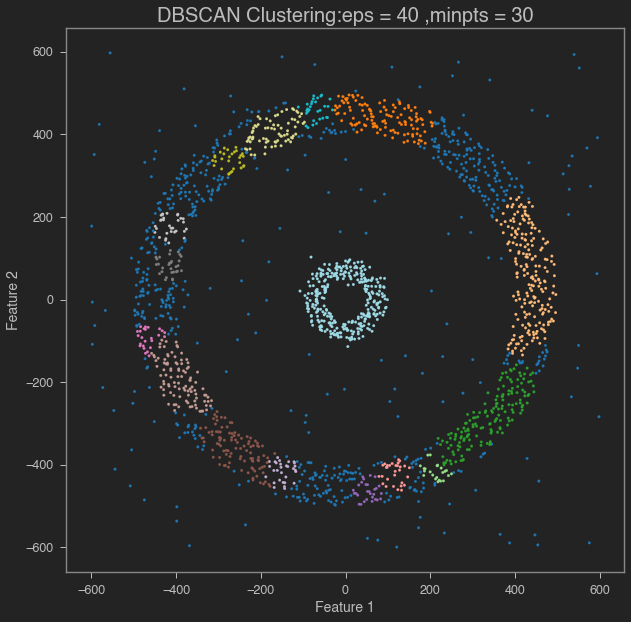

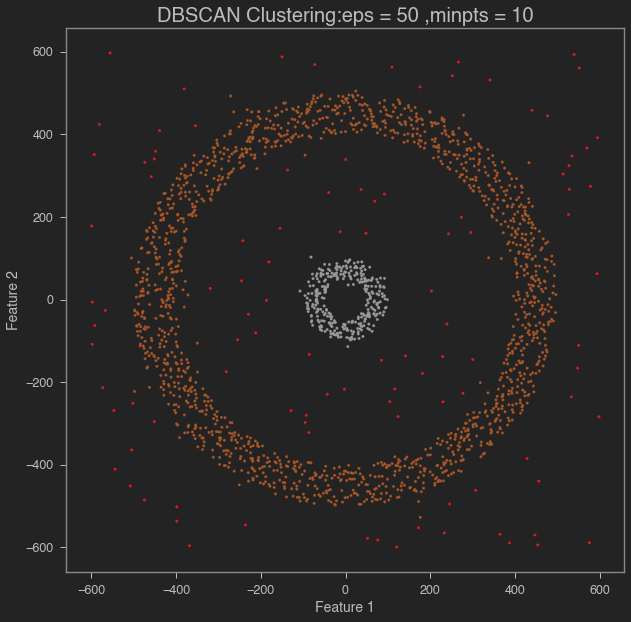

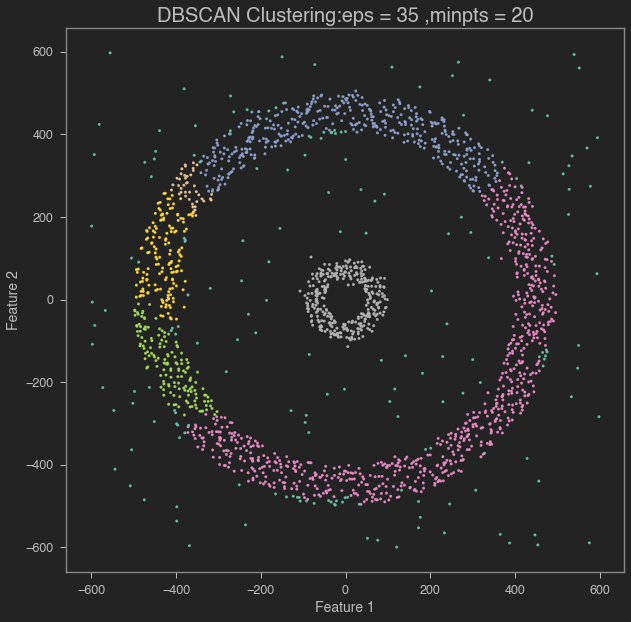

In [4]:
## write your code here
eps = 20
min_pts = 40
clusters1 = dbscan(data,eps,min_pts)
print(np.max(clusters1))
plt.figure(figsize=[10,10])
plt.scatter(data[:,0],data[:,1],c= clusters1,s=7,cmap = 'Accent')
plt.title('DBSCAN Clustering:eps = '+str(eps)+" ,minpts = "+str(min_pts),fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);

eps = 40
min_pts = 30
clusters2 = dbscan(data,eps,min_pts)
print(np.max(clusters2))
plt.figure(figsize=[10,10])
plt.scatter(data[:,0],data[:,1],c= clusters2,s=7,cmap = 'tab20')
plt.title('DBSCAN Clustering:eps = '+str(eps)+" ,minpts = "+str(min_pts),fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);

eps = 50
min_pts = 10
clusters3 = dbscan(data,eps,min_pts)
print(np.max(clusters3))
plt.figure(figsize=[10,10])
plt.scatter(data[:,0],data[:,1],c= clusters3,s=7,cmap = 'Set1')
plt.title('DBSCAN Clustering:eps = '+str(eps)+" ,minpts = "+str(min_pts),fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);

eps = 35
min_pts = 20
clusters5 = dbscan(data,eps,min_pts)
print(np.max(clusters5))
plt.figure(figsize=[10,10])
plt.scatter(data[:,0],data[:,1],c= clusters5,s=7,cmap = 'Set2')
plt.title('DBSCAN Clustering:eps = '+str(eps)+" ,minpts = "+str(min_pts),fontsize=20);
plt.xlabel('Feature 1',fontsize=14);
plt.ylabel('Feature 2',fontsize=14);

D. **Compare your model with the built in DBSCAN in Sci-kit Learn. Also compare you results with GMM and the K-means Algorithm**

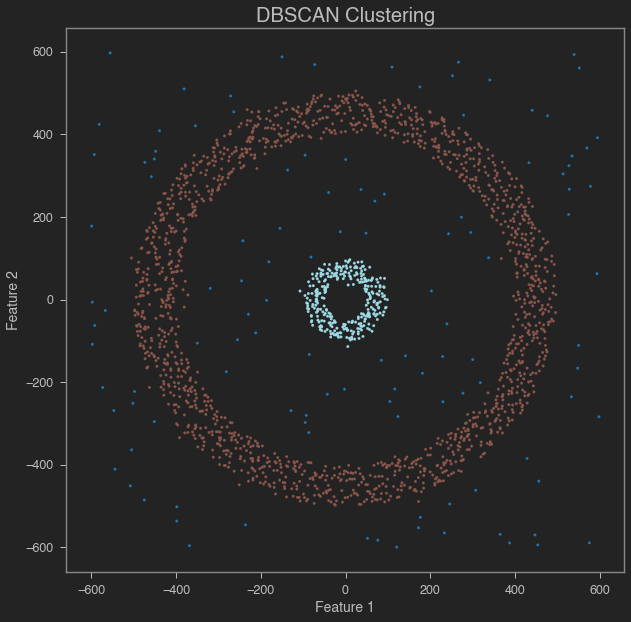

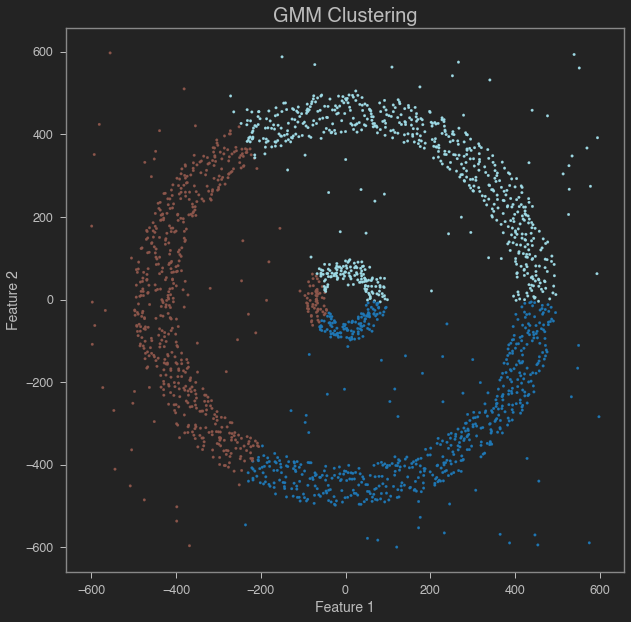

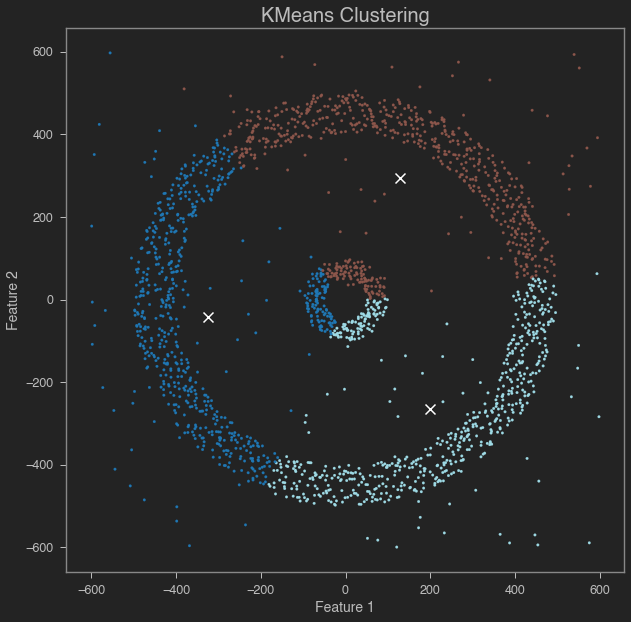

In [5]:
from sklearn.cluster import DBSCAN
## write your code here
dbscan_opt=DBSCAN(eps=30,min_samples=6)
clusters = dbscan_opt.fit_predict(data)

# labels=dbscan_opt.labels_
# data['DBSCAN_opt_labels'].value_counts()
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],c= clusters,s=7,cmap='tab20')
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()
########################################################################
from sklearn.mixture import GaussianMixture
## write your code here
plt.figure(figsize=(10,10))
gmm = GaussianMixture(n_components=3).fit(data)
labels = gmm.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=7, cmap='tab20')
plt.title('GMM Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()
########################################################################
from sklearn.cluster import KMeans
## write your code here
plt.figure(figsize=(10,10))
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=7, cmap='tab20')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=100, marker = 'x');
plt.title('KMeans Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.



## Agglomerative Clustering:

Lets start with some dummy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [6]:
def Euclidian_Dist(x,y):
##write your code here
    dist = np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
    return dist

def Dist_mat(X):
 ## write your code here
    dist_mat = np.array([])
    for i in range(len(X[:,0])):
        for j in range(len(X[:,0])):
            tmp = np.round(Euclidian_Dist(X[i,:],X[j,:]),1)
            if i == j:
                dist_mat = np.append(dist_mat,np.inf)
            else:
                dist_mat = np.append(dist_mat,tmp)
    dist_mat = np.reshape(dist_mat,[len(X[:,0]),len(X[:,0])])
    return dist_mat

def combine(X):
  ## write your code here
    mn = np.min(dist)
    ind = np.where(dist == np.min(dist))
    X[ind[0][0]] =  0.5*(X[ind[0][0]] + X[ind[0][1]])
    newX = np.delete(X,ind[0][1],0)
    return newX


In [7]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()
Y = X.T
i = len(Y[:,0])
## write your code here
while i>1:
    dist = Dist_mat(Y)
    Y = combine(Y)
    i = len(Y[:,0])
    ind = np.where(dist == np.min(dist))
    print(dist,"\n","Mean after every iteration:\n",Y.T,"\n")
    
## validate from inbuilt Dendogram
import plotly.figure_factory as ff

lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()


[[inf 1.  5.  6.4 7.4]
 [1.  inf 4.2 5.7 6.7]
 [5.  4.2 inf 1.4 2.5]
 [6.4 5.7 1.4 inf 1.1]
 [7.4 6.7 2.5 1.1 inf]] 
 Mean after every iteration:
 [[1.5 5.  6.  6.5]
 [1.  4.  5.  6. ]] 

[[inf 4.6 6.  7.1]
 [4.6 inf 1.4 2.5]
 [6.  1.4 inf 1.1]
 [7.1 2.5 1.1 inf]] 
 Mean after every iteration:
 [[1.5  5.   6.25]
 [1.   4.   5.5 ]] 

[[inf 4.6 6.5]
 [4.6 inf 2. ]
 [6.5 2.  inf]] 
 Mean after every iteration:
 [[1.5   5.625]
 [1.    4.75 ]] 

[[inf 5.6]
 [5.6 inf]] 
 Mean after every iteration:
 [[3.5625]
 [2.875 ]] 



# Clustering Algorithms on MNIST Digit dataset

Perform Kmeans and gmm clustering on MNIST dataset 


1. Load MNIST data from the given images and labels
2. Consider any 2 classes

In [8]:
!pip install idx2numpy

(10000, 784)
[7 2 1 ... 4 5 6]


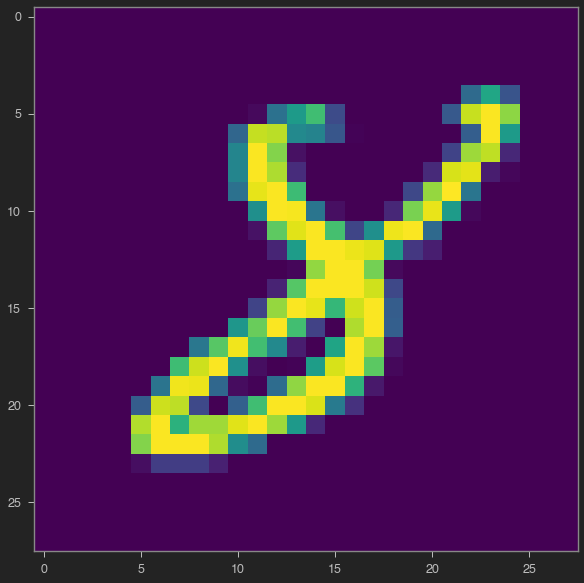

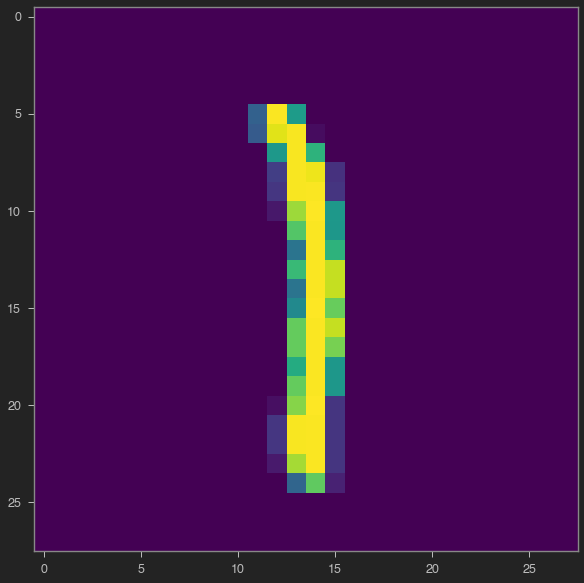

In [9]:
import idx2numpy
from keras.utils import np_utils
img_path = 't10k-images-idx3-ubyte'## write your code here
label_path = 't10k-labels-idx1-ubyte'## write your code here

Images = idx2numpy.convert_from_file(img_path)
labels = idx2numpy.convert_from_file(label_path)

## write your code here

images = np.reshape(Images , (Images.shape[0],-1))

print(images.shape)
print(labels)
plt.figure(figsize=[10,10])
plt.imshow(Images[np.random.randint(0,Images.shape[0]),:,:])
plt.figure(figsize=[10,10])
plt.imshow(Images[np.random.randint(0,Images.shape[0]),:,:])
plt.show()



Use the K-means clustering algorithm from the last lab to form the clusters 

In [10]:
## write your code here
data = np.array([])
img = np.array([])
cnt_7 = 0
cnt_9 = 0
for i in range(len(labels)):
    if labels[i] == 7:
        data = np.append(data,images[i,:],axis = 0)
        cnt_7 +=1
    if labels[i] == 9:
        data = np.append(data,images[i,:],axis = 0)
        cnt_9 +=1
data=np.reshape(data,(int(len(data)/784),784))
print(data.shape)

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels1 = kmeans.predict(data)
cntnw_7 = 0
cntnw_9 = 0
for i in range(len(labels1)):
    if labels1[i] == 0:
        cntnw_7 +=1
    if labels1[i] == 1:
        cntnw_9 +=1
print(cnt_7,cntnw_7)
print(cnt_9,cntnw_9)

(2037, 784)
1028 1095
1009 942


Use the GMM clustering algorithm from the last lab to form the clusters

In [11]:
## write your code here
gmm = GaussianMixture(n_components=2).fit(data)
labels2 = gmm.predict(data)

cntnw_7 = 0
cntnw_9 = 0
for i in range(len(labels2)):
    if labels2[i] == 0:
        cntnw_7 +=1
    if labels2[i] == 1:
        cntnw_9 +=1
print(cnt_7,cntnw_7)
print(cnt_9,cntnw_9)

1028 927
1009 1110
